In [13]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt

In [3]:
shape = gpd.read_file('Y2019M07D12_Aqueduct30_V01/future_projections/annual/shapefile/aqueduct_projections_20150309.shp')

In [4]:
# water stress 2020, optimistic, future value raw
col = 'ws2024tr'

In [5]:
ws_sample = shape[['BasinID','ws2024tr','geometry']]

In [7]:
ws_sample['ws2024tr'].describe()

count     15006.000000
mean         23.995272
std        1746.136862
min           0.000000
25%           0.000412
50%           0.018354
75%           0.208642
max      206758.612232
Name: ws2024tr, dtype: float64

In [21]:
df = pd.read_csv('out.csv')

In [22]:
df['geometry'] = [Point(xy) for xy in zip(df.longitude, df.latitude)]

/home/david/anaconda3/envs/askem/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [23]:
gdf = gpd.GeoDataFrame(df)

In [11]:
df[(df['id'].isin([1,2])) & (df['year']==2020)]\
    [['latitude','longitude','water-stress_optimistic_future-value']]

,latitude,longitude,water-stress_optimistic_future-value
866883,31.321192,25.3,3.257008
866886,31.121192,25.5,3.257008
866889,31.321192,25.5,3.257008
866892,31.521192,25.5,3.257008
866895,30.921192,25.7,3.257008
866898,31.121192,25.7,3.257008
866901,31.321192,25.7,3.257008
866904,31.521192,25.7,3.257008
866907,30.921192,25.9,3.257008
866910,31.121192,25.9,3.257008


<AxesSubplot: >

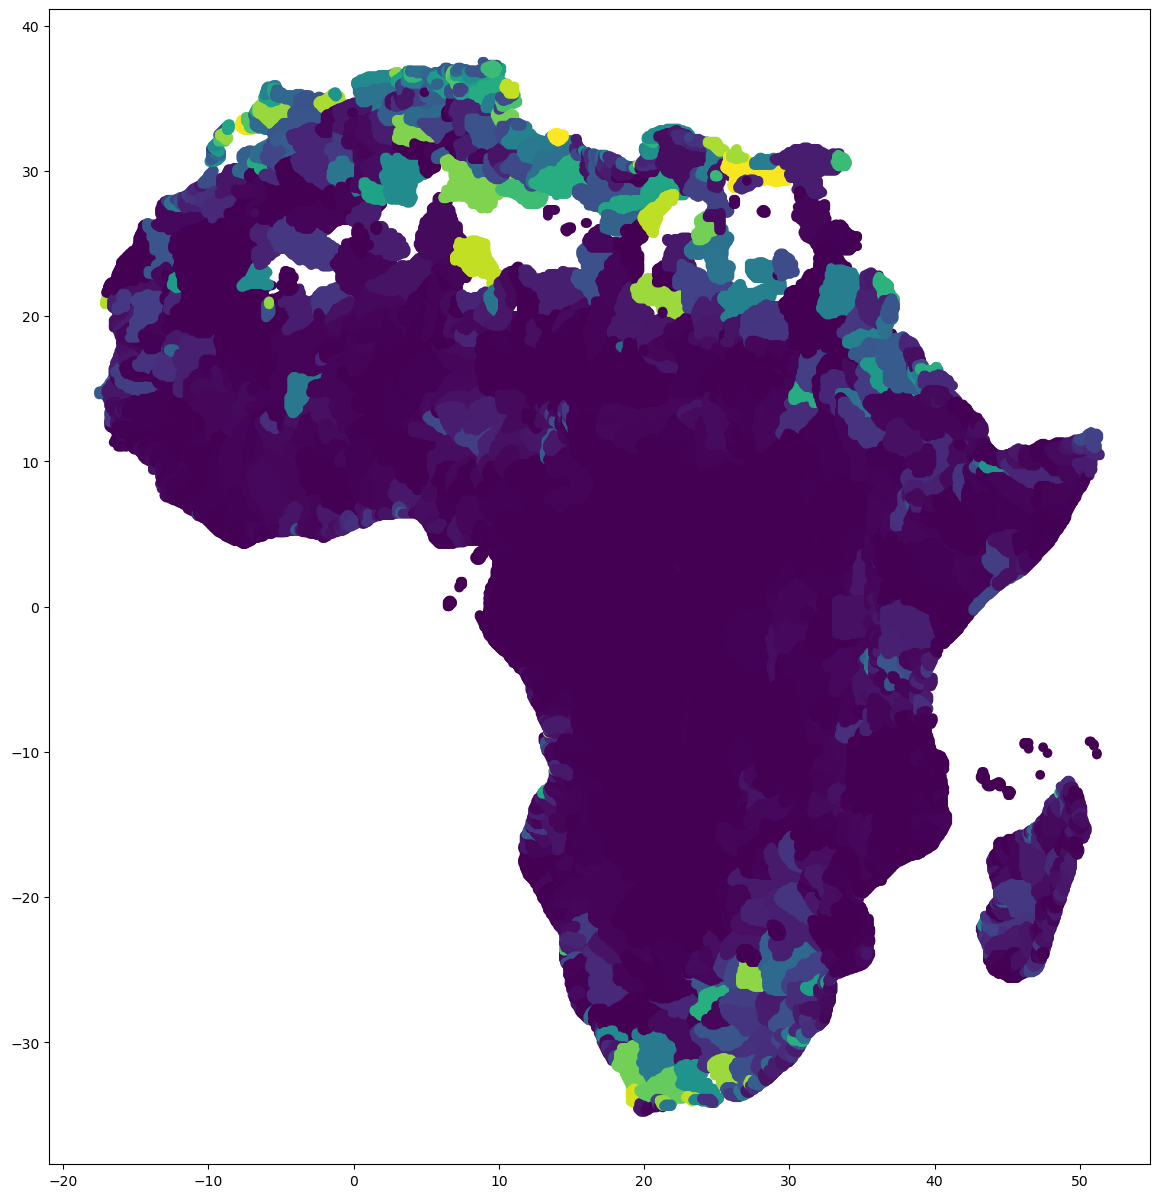

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

gdf[(gdf['year']==2020) & (gdf['water-stress_optimistic_future-value']<1)].plot(ax=ax, column='water-stress_optimistic_future-value')

<AxesSubplot: >

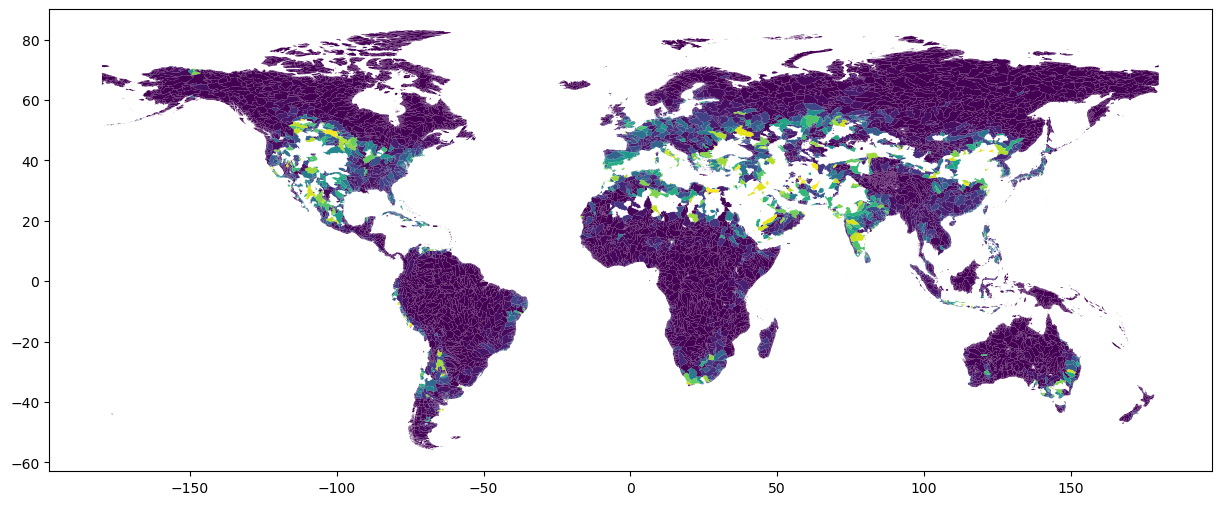

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ws_sample[ws_sample['ws2024tr']<1].plot(ax=ax, column='ws2024tr')

## Continent splitting

In [17]:
continents = gpd.read_file('World_Continents/World_Continents.shp')

In [18]:
continents

,FID,CONTINENT,SQMI,SQKM,Shape__Are,Shape__Len,geometry
0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,"MULTIPOLYGON (((35.48832 -21.68500, 35.45222 -..."
1,2,Asia,1.731728e+07,4.485173e+07,1.145290e+14,3.111768e+08,"MULTIPOLYGON (((-179.99999 68.98009, -179.9580..."
2,3,Australia,2.973612e+06,7.701651e+06,9.652152e+12,2.996954e+07,"MULTIPOLYGON (((158.88218 -54.71139, 158.87967..."
3,4,North America,9.339528e+06,2.418936e+07,1.113144e+14,5.951525e+08,"MULTIPOLYGON (((-81.67847 7.38861, -81.64945 7..."
4,5,Oceania,1.656787e+05,4.291076e+05,6.581670e+11,2.617752e+07,"MULTIPOLYGON (((179.99999 -16.96574, 179.98468..."
5,6,South America,6.856255e+06,1.775769e+07,2.068439e+13,7.737291e+07,"MULTIPOLYGON (((-67.20889 -55.89104, -67.24695..."
6,7,Antarctica,4.754809e+06,1.231495e+07,6.966421e+14,2.530685e+08,"MULTIPOLYGON (((-179.99999 -84.30535, -179.931..."
7,8,Europe,3.821854e+06,9.898597e+06,3.508924e+13,2.369117e+08,"MULTIPOLYGON (((23.84853 35.52298, 23.97138 35..."


In [19]:
shape_continents = gpd.sjoin(shape, continents)

<AxesSubplot: >

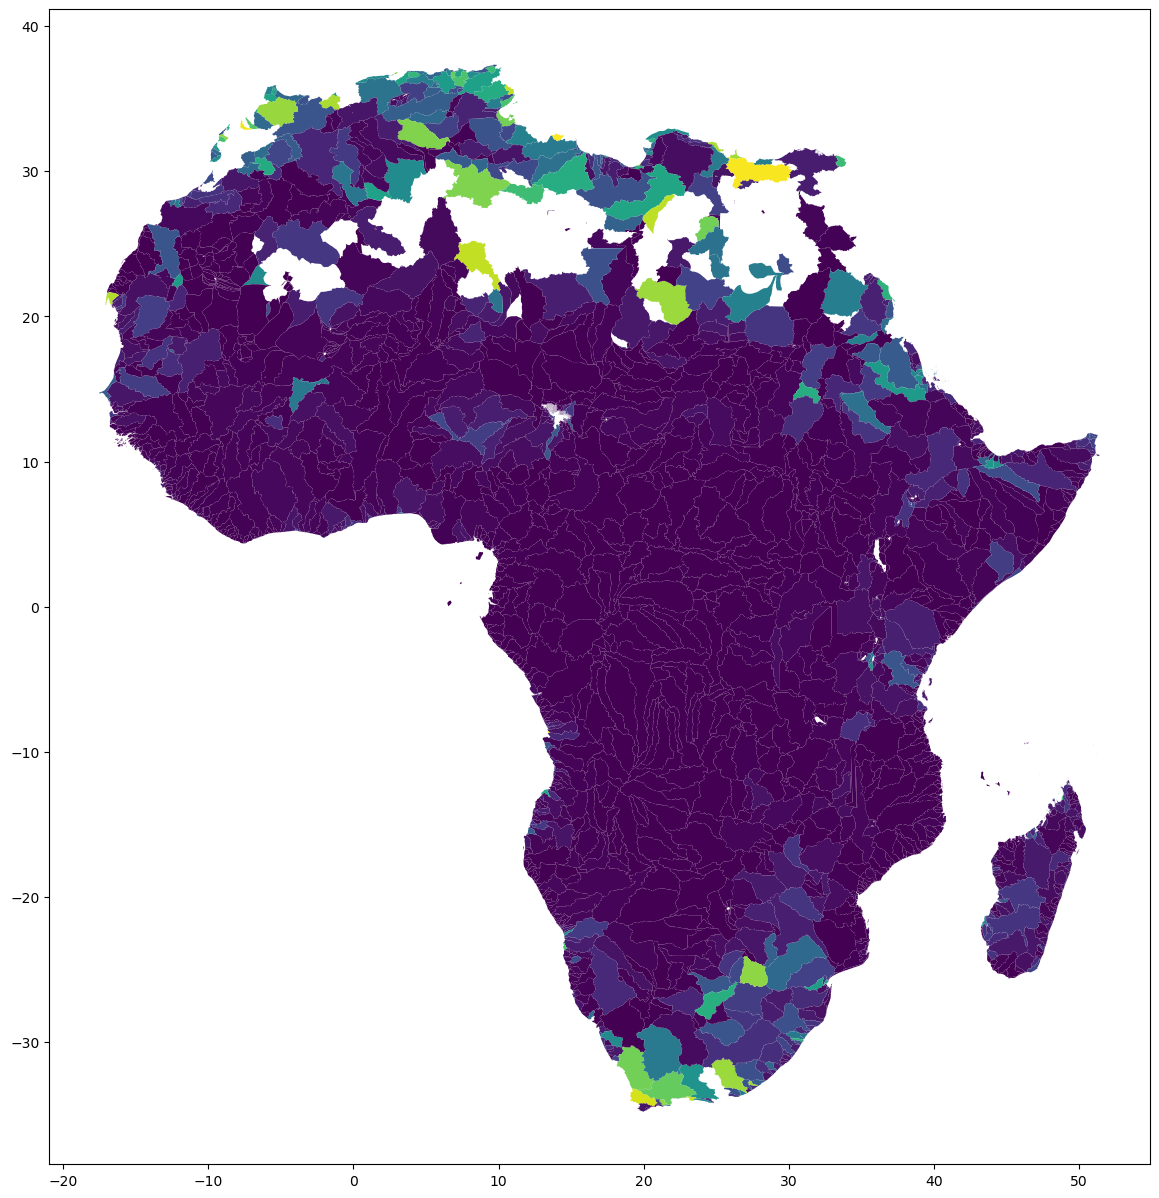

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
shape_continents[(shape_continents['ws2024tr']<1) & (shape_continents['CONTINENT']=='Africa')].plot(ax=ax, column='ws2024tr')